<img src="https://raw.githubusercontent.com/MLMI2-CSSI/foundry/main/assets/foundry-black.png" width=450>

# Foundry Quantum Monte Carlo ML Quickstart

*Original Paper:* https://arxiv.org/pdf/2210.06430.pdf

*Dataset:* https://doi.org/10.18126/wg30-95z0


This notebook is set up to run locally or as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.


In [1]:
try:
    import google.colab
    no_local_server = True
    no_browser = True
    use_globus = False
except: # when not in google colab
    no_local_server = False
    no_browser = False
    use_globus = False

# Environment Set Up
First we'll need to install Foundry as well as a few other packages. If you're using Google Colab, this code block will install these packages into the Colab environment.
If you are running locally, it will install these modules onto your machine if you do not already have them. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/bandgap) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [ ]:
!pip install matplotlib
!pip install foundry_ml
!pip install seaborn
!pip install pymatgen

We need to import a few packages. We'll be using [Matplotlib](https://matplotlib.org/) to make visualizations of our data, [scikit-learn](https://scikit-learn.org/stable/) to create our model, and [pandas](https://pandas.pydata.org/) and [NumPy ](https://numpy.org/)to work with our data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymatgen as mg
from pymatgen.core import Molecule
import json

sns.set_context("poster")

# Instantiate and Authenticate Foundry
Once the installations are complete, we can import Foundry.

In [5]:
from foundry import Foundry

We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [6]:
f = Foundry(no_local_server=no_local_server, 
            no_browser=no_browser, 
            use_globus=use_globus)

Load the Quantum Monte Carlo Database
Now that we've installed and imported everything we'll need, it's time to load the data. We'll use the `get_datasaet()` function of the `Foundry` client to get the dataset by it's DOI.

In [8]:
ds = f.get_dataset("10.18126/wg30-95z0")
ds

The dataset can be loaded in multiple formats, but for this exercise, we'll load it as a dictionary.

In [9]:
X,y = ds.get_as_dict()['train']

Starting Download of: https://data.materialsdatafacility.org/foundry/foundry_qmc_ml_v1.1/QM9_AMONS_NI_LE.csv
Downloading... 3.00 MB

In [10]:
df = pd.concat([X,y], axis=1) # sometimes easier to work with the two together

# Read in Molecules to PyMatgen

In [11]:
df['mols'] = df['pymatgen'].map(lambda x: Molecule.from_str(x, fmt="json"))

In [12]:
df['mols'].iloc[1]

Molecule Summary
Site: N (0.9584, 0.0008, -0.0909)
Site: H (0.6337, -0.4803, -0.9214)
Site: H (0.6337, -0.5260, 0.7112)
Site: H (1.9712, -0.0300, -0.0919)

In [13]:
y

,HF,PBE,PBE0,B3LYP,DMC(HF),DMC(PBE),DMC(PBE0),DMC(B3LYP),DMC(HF)_err,DMC(PBE)_err,DMC(PBE0)_err,DMC(B3LYP)_err
0,-40.213319,-40.463311,-40.474441,-40.502281,-40.505949,-40.507009,-40.506361,-40.507445,0.000254,0.000324,0.000276,0.000268
1,-56.217747,-56.506473,-56.512004,-56.548145,-56.548474,-56.549669,-56.549932,-56.548896,0.000295,0.000311,0.000333,0.001754
2,-76.056712,-76.372988,-76.374332,-76.422727,-76.418852,-76.713019,-76.420688,-76.413894,0.000557,0.187849,0.000325,0.001786
3,-76.849752,-77.249870,-77.254838,-77.312373,-77.311679,-77.313623,-77.313971,-77.313162,0.000344,0.000428,0.000327,0.000451
4,-92.908793,-93.343723,-93.342293,-93.409677,-93.400892,-93.404961,-93.403568,-93.402726,0.000346,0.000471,0.000380,0.000345
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,-256.846102,-258.074665,-258.065662,-258.215410,-258.180579,-258.192642,-258.193357,-258.194356,0.000940,0.000668,0.000619,0.000708
1171,-276.623432,-277.896798,-277.874473,-278.041561,-277.989466,-278.004884,-278.004708,-278.004412,0.000856,0.000704,0.000857,0.000852
1172,-272.808957,-274.086661,-274.067309,-274.225884,-274.180110,-274.192144,-274.192828,-274.192713,0.000651,0.000692,0.000768,0.000589
1173,-292.590852,-293.911606,-293.879078,-294.054962,-293.990211,-294.008635,-294.008265,-294.006492,0.000707,0.000873,0.001181,0.000766


# Data Exploration

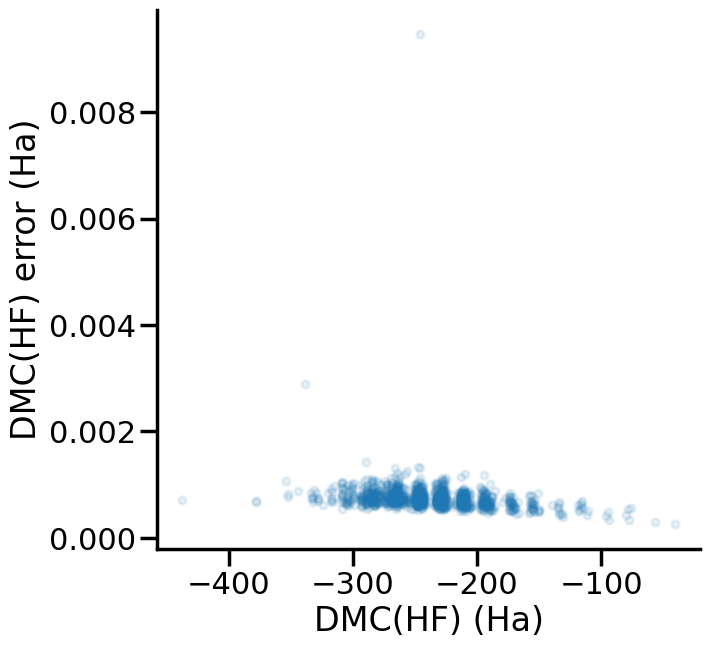

In [14]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(
    y['DMC(HF)'],
    y['DMC(HF)_err'],
    s=30,
    alpha=0.1
)

# plt.xlim(-1.75, -1.5)
# plt.ylim(-1.75, -1.5)

ax.set_xlabel("DMC(HF) (Ha)")
ax.set_ylabel("DMC(HF) error (Ha)")
sns.despine()

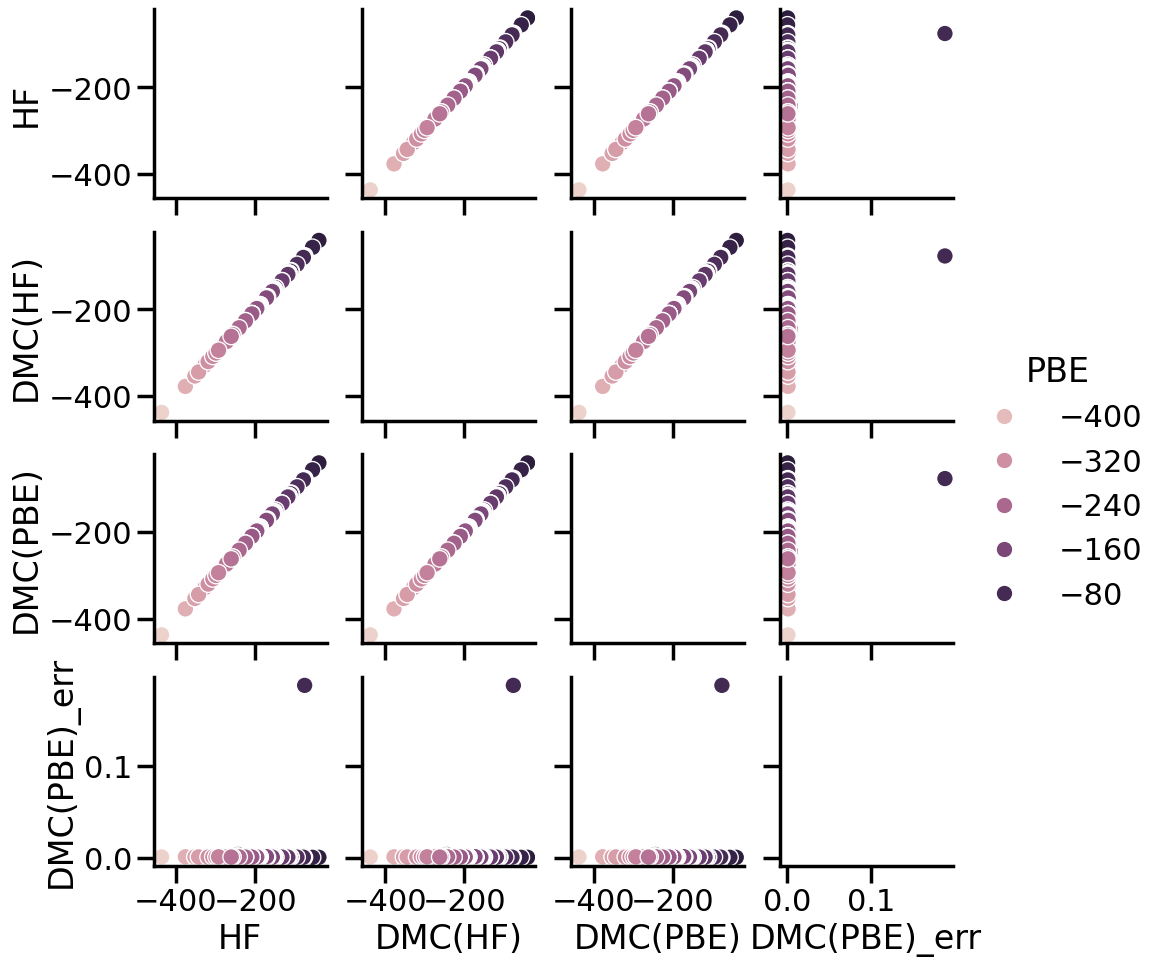

In [15]:
sns.set_context('poster')
ax = sns.pairplot(y[['PBE','HF','DMC(HF)','DMC(PBE)','DMC(PBE)_err']], hue='PBE')